<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [2]:
! nvidia-smi
! pip install min-dalle==0.3.11

Sat Jul  9 14:20:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Load Model

In [3]:
from IPython.display import display, update_display
from math import log2
import torch
from min_dalle import MinDalle

model = MinDalle(
    dtype=torch.float16,
    is_mega=True, 
    is_reusable=True
)

intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


### Generate Images

- `grid_size` Size of the image grid.  Reduce this if you run out of GPU memory.

- `intermediate_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

- `top_k` Each image token is sampled from the top $k$ most probable tokens

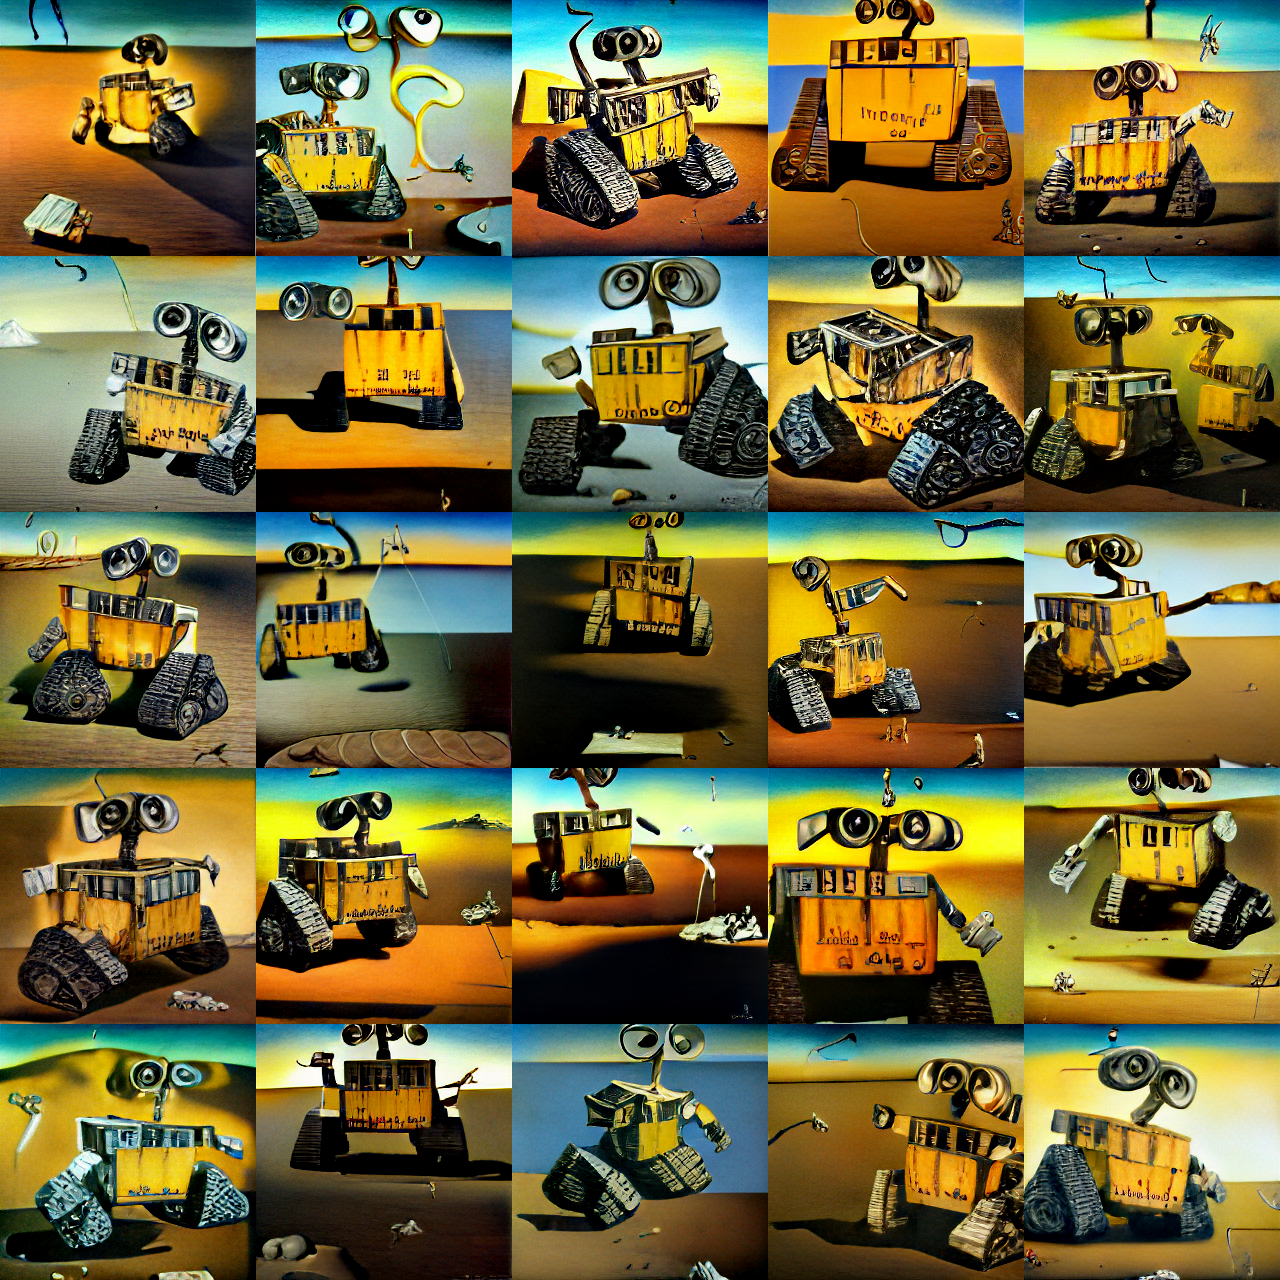

CPU times: user 1min 23s, sys: 466 ms, total: 1min 24s
Wall time: 1min 24s


In [5]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
intermediate_outputs = True #@param {type:"boolean"}
grid_size = 5 #@param {type:"integer"}
supercondition_factor = 16 #@param ["2", "4", "8", "16", "32", "64"] {type:"raw"}
top_k = 64 #@param ["2", "4", "8", "16", "32", "64", "128", "256", "512", "1024"] {type:"raw"}
log2_mid_count = 3 if intermediate_outputs else 0

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    log2_mid_count=log2_mid_count,
    log2_k=int(log2(top_k)),
    log2_supercondition_factor=log2(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False